<a href="https://colab.research.google.com/github/subodhkanoujiya4/Clustering_with_K-Means/blob/main/Clustering_with_K_means.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Clustering with K-Means.



 ## Objective: Perform unsupervised learning with K-Means clustering.


*   Upload Mall_Customers.csv Dataset.

In [7]:
from google.colab import files
uploaded = files.upload()

Saving Mall_Customers.csv to Mall_Customers (1).csv


# Import libraries.
# Load Dataset.



In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

#  Load dataset
df = pd.read_csv('Mall_Customers.csv')

#  View first few rows
print(df.head())

# We'll use numerical features only
X = df[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']]

# Feature scaling (important for K-Means)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

#  Reduce to 2D using PCA for visualization
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

#  Fit K-Means (initial K=5 for demo) and assign cluster labels
kmeans = KMeans(n_clusters=5, random_state=42)
labels = kmeans.fit_predict(X_scaled)




   CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
0           1    Male   19                  15                      39
1           2    Male   21                  15                      81
2           3  Female   20                  16                       6
3           4  Female   23                  16                      77
4           5  Female   31                  17                      40


# Elbow Method for optimal K.
# ANd show Elbow Plot.

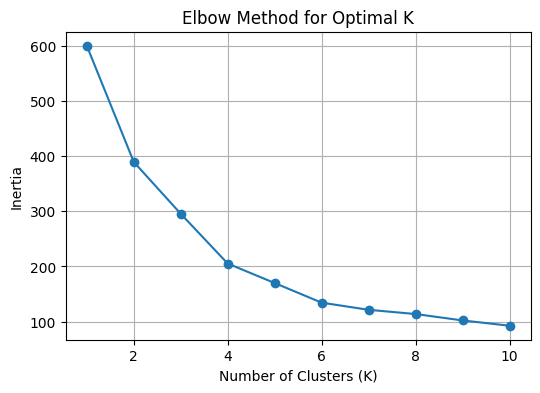

In [9]:
#  Elbow Method to find optimal K
inertia = []
K_range = range(1, 11)
for k in K_range:
    km = KMeans(n_clusters=k, random_state=42)
    km.fit(X_scaled)
    inertia.append(km.inertia_)

# Plot Elbow
plt.figure(figsize=(6, 4))
plt.plot(K_range, inertia, marker='o')
plt.title("Elbow Method for Optimal K")
plt.xlabel("Number of Clusters (K)")
plt.ylabel("Inertia")
plt.grid(True)
plt.show()

# Visualize K-Means Clusters (PCA- based).
# Evaluate clustering using Silhouette Score

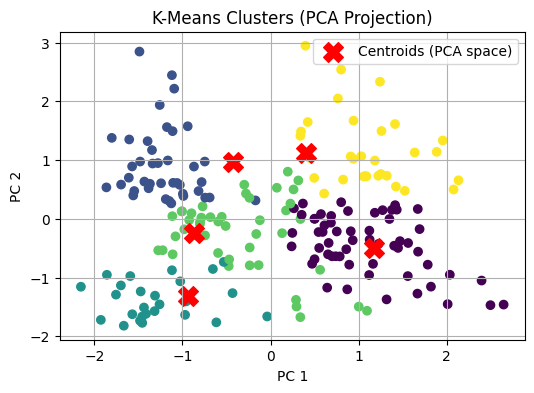

Silhouette Score for K=5: 0.408


In [10]:
#  Visualize clusters (PCA-based)
plt.figure(figsize=(6, 4))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=labels, cmap='viridis')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1],
            s=200, c='red', marker='X', label='Centroids (PCA space)')
plt.title("K-Means Clusters (PCA Projection)")
plt.xlabel("PC 1")
plt.ylabel("PC 2")
plt.legend()
plt.grid(True)
plt.show()

#  Evaluate clustering using Silhouette Score
score = silhouette_score(X_scaled, labels)
print(f"Silhouette Score for K=5: {score:.3f}")